# Mental Health Corpus
## Data presentation
The dataset "Mental health copus" is a collection of text written by people who have been diagnosed with mental health disorders such as anxiety, depression, and other mental health issues. The data consist of two columns and 27977 entries.
1. Text - Text includes the text writen by 
2. Label - The label indicats wheter the text is written by a person with a mental disorder or not.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import string
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.model_selection import train_test_split
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mikkelpedersen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mikkelpedersen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
path = "/Users/mikkelpedersen/Desktop/uni/Kandidat/2.semester/ML_DL/Eksamen/mental_health.csv"
mh = pd.read_csv(path)

In [3]:
mh.head(10)

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
5,hey rredflag sure right place post this goes ...,1
6,feel like someone needs hear tonight feeling r...,0
7,deserve liveif died right noone would carei re...,1
8,feels good ive set dateim killing friday nice ...,1
9,live guiltok made stupid random choice its ge...,1


# EDA (Exploratory data analisys)

In [4]:
# Initial inspection of the data.
def suma(data, col1):
    print('The amount of missing values in the DataFrame:')
    print(data.isnull().sum())
    print('-'*40)
    print('The amount of 1, 0 in the DataFrame:')
    print(data[col1].value_counts())
    print('-'*40)
    print(data.info())
    sns.countplot(data=data, x=col1)

The amount of missing values in the DataFrame:
text     0
label    0
dtype: int64
----------------------------------------
The amount of 1, 0 in the DataFrame:
label
0    14139
1    13838
Name: count, dtype: int64
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB
None


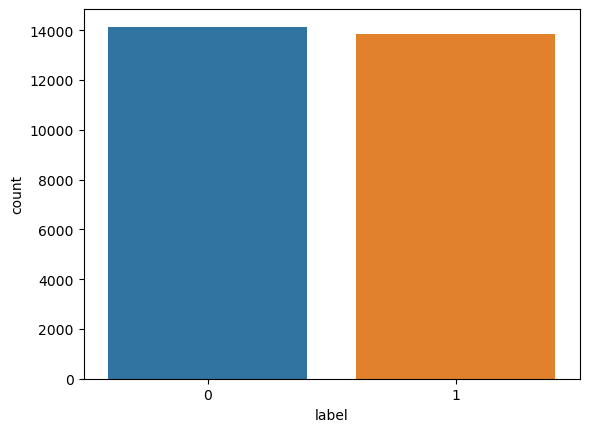

In [5]:
suma(mh, 'label')

After the initial inspecting of the distribution it is clear that the data is balanced. Both classes has around 14000 entries, and would therefore be considered as "balanced" in a classification context.

In [6]:
# Check for duplicates in the Text column. 
mh[mh.duplicated(subset='text', keep=False)]

,text,label
1646,posting ara ara forget day ara ara,0
11570,real suppleroot hours up day far,0
12573,real suppleroot hours up day far,0
15524,happy birthday everyone birthday st october ha...,0
16742,need help anyone good pythagriam tribometry h...,0
22389,real suppleroot hours up day far,0
22603,posting ara ara forget day ara ara,0
24502,happy birthday everyone birthday st october ha...,0
24970,need help anyone good pythagriam tribometry h...,0


In [7]:
# inspect the length of the text column to see if any can be concluded 
mh['length_text'] = mh['text'].apply(lambda x: len(x))

In [8]:
# General info in the text length colum
mh['length_text'].describe().round(1)

count    27977.0
mean       464.6
std        699.1
min          2.0
25%         99.0
50%        237.0
75%        559.0
max      25289.0
Name: length_text, dtype: float64

In [9]:
def length_plot(data, col1, col2):
    fig, ax = plt.subplots(1,1,figsize = (8,5))
    sns.histplot(data,
                x = col1,
                bins = 80,
                hue = col2,
                ax = ax)

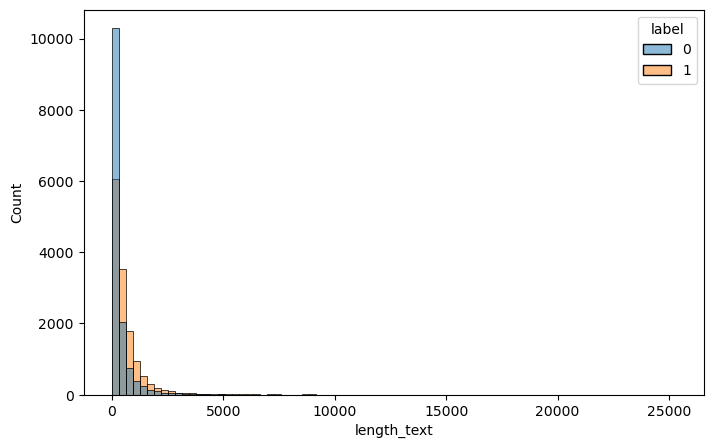

In [10]:
length_plot(mh, 'length_text', 'label')

In [11]:
# To visualize the The outliers a little more clearly
def box_length(data, col1):
    sns.boxplot(x=data[col1])
    plt.xlabel('Length of Text')
    plt.title('Box Plot of Text Length')
    plt.show()

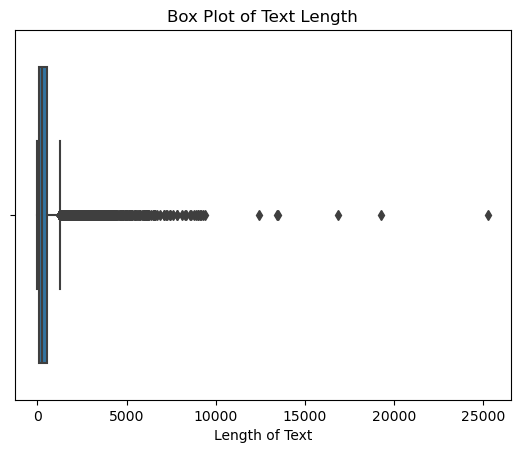

In [12]:
box_length(mh, 'length_text')

In [13]:
print('The length of the top 10 longest:')
print(mh['length_text'].sort_values(ascending=False).head(10))

The length of the top 10 longest:
5343     25289
26111    19243
18531    16862
1654     13477
2659     13440
5389     12445
930       9411
1786      9286
19513     9175
10125     9122
Name: length_text, dtype: int64


The only thing concludable from this is that the person who wrote 25289 charecters is mental ill on a whole new level.

To ensure that the length of each text does not affact the model at a later state every entry exeding 10000 charecters will be dropped in the preprocessing part.  

In [14]:
mh.sort_values(by='length_text', ascending=False).head(15)

,text,label,length_text
5343,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,1,25289
26111,slipping cracks testimony subhuman early twent...,1,19243
18531,know post here think step outside world thing ...,1,16862
1654,failed would like read hell kill myselflets st...,1,13477
2659,lost friendnote posted tifu subreddit found wo...,1,13440
5389,suicidal heres personal story im even world th...,1,12445
930,match tag team table match bubba ray spike du...,0,9411
1786,want help want dieredflag like natural selecto...,1,9286
19513,wonder going help mei scared death posting her...,1,9175
10125,today twentieth birthday know live see thirtie...,1,9122


In [15]:
#print(mh['text'].iloc[5342])

# Preprocessing

In [16]:
# To ensure the orginal data is accesable at all time a copy of it will be created
mh_copy = mh.copy(deep=True)

In [17]:
# Drops all duplicates from the given list of strings.
mh.drop_duplicates(subset='text', 
                   keep='last', 
                   inplace=True)

# The print statment is to ensure that the duplicates are correcly removed
mh[mh.duplicated(subset='text', keep=False)]

,text,label,length_text


In [18]:
mh = mh[mh['length_text'] <= 10000]

In [19]:
mh.sort_values(by='length_text', ascending=False).head(15)

,text,label,length_text
930,match tag team table match bubba ray spike du...,0,9411
1786,want help want dieredflag like natural selecto...,1,9286
19513,wonder going help mei scared death posting her...,1,9175
10125,today twentieth birthday know live see thirtie...,1,9122
25866,bubble wrap gtoltgtoltgtoltgtoltgtoltgtoltgtol...,0,9018
23130,really know anymore manok really got get out k...,1,8992
23425,even possible fix always broken fell apartplea...,1,8912
8975,im sociopath kill continue hurt people destroy...,1,8769
785,know anymoreapologies advance know im longwind...,1,8589
24966,hi new guy herecaution big wall text sorry bom...,1,8538


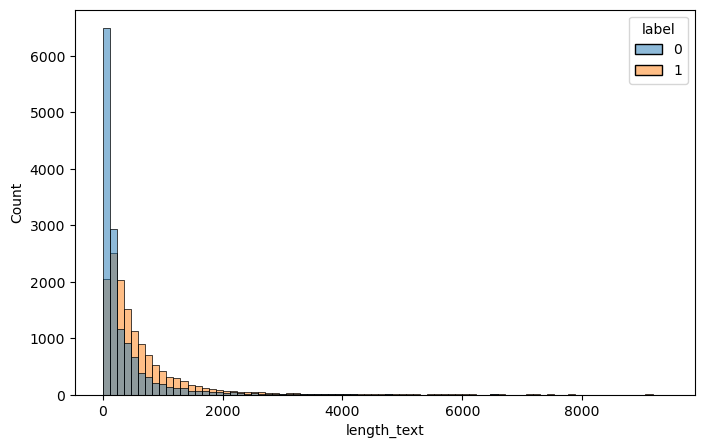

In [20]:
length_plot(mh, 'length_text', 'label')

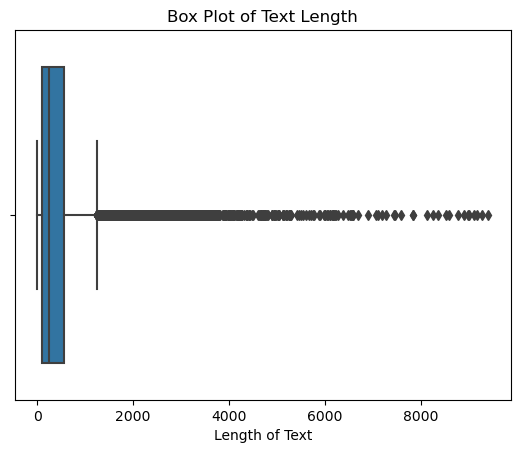

In [21]:
box_length(mh, 'length_text')

After the removal of entries exceeding  10,000 characters in length the data is better ditributed as seen in box plot

In [22]:
stemmer = PorterStemmer()#WordNetLemmatizer() 
stop = stopwords.words('english')
# The nltk tweettokenizer is specificly made user inputted text which in this case suits the text column iminent-> https://www.nltk.org/api/nltk.tokenize.casual.html
tt = TweetTokenizer()

def preprocess_text_tt(text):
    # Lowercasing the text and removing punkts
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    #Remove stopwords and stem 
    words = [word for word in text.split() if word not in stop]
    text = ' '.join([stemmer.stem(word) for word in words])
    
    # Tokenizing
    text = tt.tokenize(text)
    return text

In [23]:
sno = nltk.stem.SnowballStemmer('english')
wnl = WordNetLemmatizer()
wst = WhitespaceTokenizer()

def preprocess_text_wst(text):
    # Lowercasing the text and removing punkts
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    #Remove stopwords and lemma 
    words = [word for word in text.split() if word not in stop]
    text = ' '.join([sno.stem(word) for word in words])
    
    # Tokenizing
    text = wst.tokenize(text)
    return text

In [24]:
# test if the preprocess function works as intended
preprocess_text_tt(""" Machine Learning(ML) is a subset of artificial intelligence that provides systems the ability to automatically learn and improve from experience without being explicitly programmed.
                It focuses on the development of computer programs that can access data and use it to learn for themselves""")

# Text is provided by Copilot 
# Output are collapsed

['machin',
 'learningml',
 'subset',
 'artifici',
 'intellig',
 'provid',
 'system',
 'abil',
 'automat',
 'learn',
 'improv',
 'experi',
 'without',
 'explicitli',
 'program',
 'focus',
 'develop',
 'comput',
 'program',
 'access',
 'data',
 'use',
 'learn']

In [25]:
preprocess_text_wst(""" Machine Learning(ML) is a subset of artificial intelligence that provides systems the ability to automatically learn and improve from experience without being explicitly programmed.
                It focuses on the development of computer programs that can access data and use it to learn for themselves""")

# Text is provided by Copilot
# Output are collapsed

['machin',
 'learningml',
 'subset',
 'artifici',
 'intellig',
 'provid',
 'system',
 'abil',
 'automat',
 'learn',
 'improv',
 'experi',
 'without',
 'explicit',
 'program',
 'focus',
 'develop',
 'comput',
 'program',
 'access',
 'data',
 'use',
 'learn']

The difference between using the TweetTokenizer plus PortStemmer and WhitespaceTokenizer plus SnowballStemmer is non existing when testing. The choosen method will therefore be the TweetTokenizer plus PortStemmer due to the TweetTokenizer being made for user inputted text.

In [26]:
mh['preprocessed_text_tt'] = mh['text'].apply(preprocess_text_tt)
mh.head(10)

,text,label,length_text,preprocessed_text_tt
0,dear american teens question dutch person hear...,0,135,"[dear, american, teen, question, dutch, person..."
1,nothing look forward lifei dont many reasons k...,1,117,"[noth, look, forward, lifei, dont, mani, reaso..."
2,music recommendations im looking expand playli...,0,450,"[music, recommend, im, look, expand, playlist,..."
3,im done trying feel betterthe reason im still ...,1,594,"[im, done, tri, feel, betterth, reason, im, st..."
4,worried year old girl subject domestic physic...,1,2133,"[worri, year, old, girl, subject, domest, phys..."
5,hey rredflag sure right place post this goes ...,1,411,"[hey, rredflag, sure, right, place, post, goe,..."
6,feel like someone needs hear tonight feeling r...,0,455,"[feel, like, someon, need, hear, tonight, feel..."
7,deserve liveif died right noone would carei re...,1,349,"[deserv, liveif, die, right, noon, would, care..."
8,feels good ive set dateim killing friday nice ...,1,75,"[feel, good, ive, set, dateim, kill, friday, n..."
9,live guiltok made stupid random choice its ge...,1,445,"[live, guiltok, made, stupid, random, choic, g..."


In [27]:
# Makes it usable for the models -> to string
mh['prep_text_tt_join'] = mh['preprocessed_text_tt'].apply(' '.join)

In [28]:
# To inspect the data thoroughly before procedding to the models
mh.sample(60).sort_values(ascending=False, by='length_text')

,text,label,length_text,preprocessed_text_tt,prep_text_tt_join
3335,originally saw movie boy old rialto theatre pa...,0,2889,"[origin, saw, movi, boy, old, rialto, theatr, ...",origin saw movi boy old rialto theatr part sat...
10917,get film possible find really good performance...,0,2771,"[get, film, possibl, find, realli, good, perfo...",get film possibl find realli good perform barb...
5478,thats folksi posted maybe weeks ago rdepress...,1,2624,"[that, folksi, post, mayb, week, ago, rdepress...",that folksi post mayb week ago rdepress basic ...
6823,ive never good enoughim years old male battl...,1,2281,"[ive, never, good, enoughim, year, old, male, ...",ive never good enoughim year old male battl de...
26827,extraordinary film musically made feel awful r...,0,2150,"[extraordinari, film, music, made, feel, aw, r...",extraordinari film music made feel aw rodrigu ...
24421,tried everything could think of even came clos...,1,1442,"[tri, everyth, could, think, even, came, close...",tri everyth could think even came close still ...
6499,wish successfull redflag years agowhere even ...,1,1263,"[wish, successful, redflag, year, agowher, eve...",wish successful redflag year agowher even begi...
12632,hey never thought would somehow ended here rea...,1,969,"[hey, never, thought, would, somehow, end, rea...",hey never thought would somehow end realli nee...
3408,end junediagnosed anxiety depression wrote bef...,1,877,"[end, junediagnos, anxieti, depress, wrote, ki...",end junediagnos anxieti depress wrote kind sep...
11741,life sucks work hard days week lot anxieties ...,1,780,"[life, suck, work, hard, day, week, lot, anxie...",life suck work hard day week lot anxieti sinc ...


# Model selection

In [54]:
# Import
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             f1_score,
                             recall_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay)

from keras.models import Sequential
from keras.layers import Dense

In [30]:
X = mh['prep_text_tt_join']
y = mh['label']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [31]:
vectorizer = CountVectorizer()

# The reson for only applying fit_transform on the X_train is to learn the vocabulary and transform the data into a document-term matrix. As i understood this helps prevent data leakege???
# The labels is a reday for use so they will not be vectorized
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [33]:
X_train.shape, X_test.shape

((22372, 47362), (5594, 47362))

In [48]:
# These are the basic models with only deafult parameters 
# Machine learning models
logReg = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC()

def train_model(model):
    for model in [model]:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        # accuracy = (number of correct predictions) / (total number of predictions)
        train_acc = round(model.score(X_train, y_train)*100, 3)
        test_acc = round(accuracy_score(y_test, y_pred)*100, 3)
        print('The accuracy for the traning set: ', train_acc)
        print('The accuracy for the test set: ', test_acc)
        print('-' * 40)
        return y_pred
        

def matrices(model):
    for model in [model]:
        print(classification_report(y_test, model.predict(X_test)))
        print(confusion_matrix(y_test, model.predict(X_test)))
        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, colorbar=False, cmap=plt.cm.Blues)
        print('-' * 40)

In [50]:
train_model(logReg)
train_model(rf)
train_model(svc)

The accuracy for the traning set:  97.609
The accuracy for the test set:  91.437
----------------------------------------
The accuracy for the traning set:  99.991
The accuracy for the test set:  89.078
----------------------------------------
The accuracy for the traning set:  92.955
The accuracy for the test set:  90.597
----------------------------------------


array([0, 0, 0, ..., 1, 1, 1])

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2827
           1       0.93      0.89      0.91      2767

    accuracy                           0.91      5594
   macro avg       0.92      0.91      0.91      5594
weighted avg       0.92      0.91      0.91      5594

[[2649  178]
 [ 301 2466]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2827
           1       0.88      0.90      0.89      2767

    accuracy                           0.89      5594
   macro avg       0.89      0.89      0.89      5594
weighted avg       0.89      0.89      0.89      5594

[[2485  342]
 [ 269 2498]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2827
           1       0.92      0.89      0.90      2767

    accuracy                           0.91   

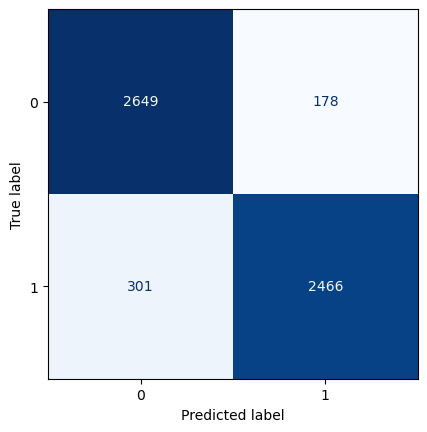

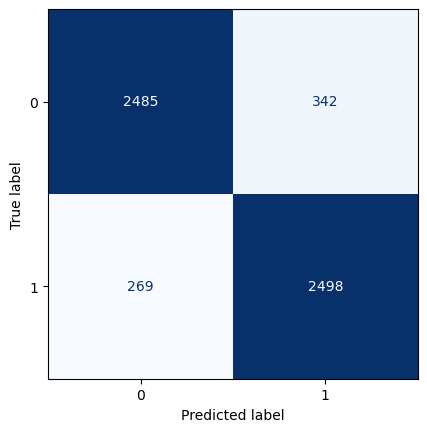

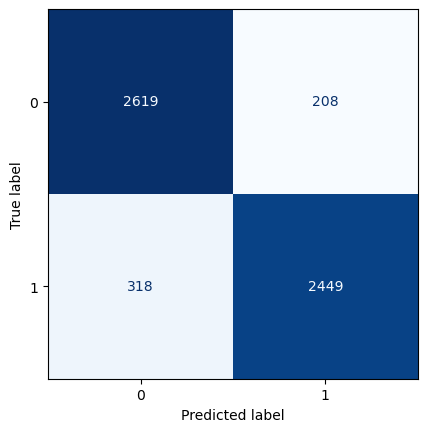

In [51]:
matrices(logReg)
matrices(rf)
matrices(svc)

In [57]:
# Deep learning model
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(Dense(10, input_dim=input_dim, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Sigmoid beacuse it is a binary classification problem

# Compile the model
model.compile(loss='binary_crossentropy', 
              optimizer='SGD', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.3f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.3f}".format(accuracy))


Training Accuracy: 1.000
Testing Accuracy:  0.906
